<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module4/DS9_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

Hint: If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function.

In [0]:
import pandas as pd
nombres=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None, names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])

In [0]:
df.head(4)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,00100,3,+


In [0]:
#df['A16'].replace({'+': 1})
import numpy as np
df=df.replace({'?': np.NaN, '-':0, '+':1})
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [0]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
df.head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,00202,0,1


In [0]:
df[["A2"]] = df[["A2"]].apply(pd.to_numeric)

In [0]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16      int64
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
df.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,1


In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import scipy.stats

In [0]:
df['A16']=pd.to_numeric(df['A16'].astype(float))
df.head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,00202,0,1.0


###TTest 1.)

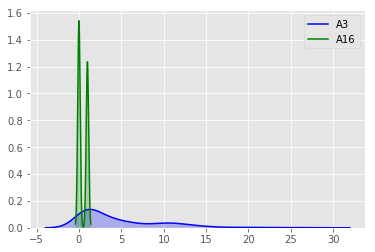

In [0]:
sns.kdeplot(df['A3'], shade=True, color='b')
sns.kdeplot(df['A16'], shade=True, color='g')
plt.show;

In [0]:

matplotlib.style.use('ggplot')
from scipy.stats import ttest_1samp

In [0]:
df.groupby(['A16'])['A3'].sum() 

A16
0.0    1470.70
1.0    1812.82
Name: A3, dtype: float64

In [0]:
from scipy.stats import t
from scipy import stats

In [0]:
acomm = df[df['A16'] == 1]['A3']
dcomm = df[df['A16'] == 0]['A3']
stats.ttest_ind(acomm, dcomm)

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

###TTest 2.)



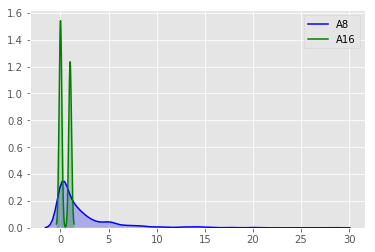

In [0]:
sns.kdeplot(df['A8'], shade=True, color='b')
sns.kdeplot(df['A16'], shade=True, color='g')
plt.show;

In [0]:
df.groupby(['A16'])['A8'].sum() 

A16
0.0     481.785
1.0    1052.365
Name: A8, dtype: float64

In [0]:
asales = df[df['A16'] == 1]['A8']
dsales = df[df['A16'] <= 0]['A8']
stats.ttest_ind(asales, dsales)

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

###Chi 1.)

In [0]:
df['A16']=pd.to_numeric(df['A16'].astype(float))

In [0]:
contingency_table1= t=crosstab=pd.crosstab(df['A16'],df['A3'])
contingency_table1

A3,0.0,0.04,0.08,0.085,0.125,0.165,0.17,0.205,0.21,0.25,0.29,0.335,0.375,0.415,0.42,0.46,0.5,0.54,0.58,0.585,0.625,0.665,0.67,0.705,0.71,0.75,0.79,0.83,0.835,0.875,0.915,0.96,1.0,1.04,1.08,1.085,1.125,1.165,1.21,1.25,...,12.125,12.25,12.33,12.335,12.5,12.54,12.625,12.75,12.835,13.0,13.335,13.5,13.585,13.665,13.75,13.915,14.0,14.5,14.585,14.79,15.0,15.5,16.0,16.165,16.5,17.75,18.125,18.5,19.0,19.5,20.0,21.0,21.5,22.0,22.29,25.085,25.125,25.21,26.335,28.0
A16,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,10,2,0,1,3,4,1,1,1,4,4,6,3,4,1,2,8,5,1,8,3,3,1,1,1,12,3,1,7,3,0,0,5,3,1,3,2,2,1,16,...,1,0,0,0,4,0,1,1,1,2,1,2,0,1,0,0,1,1,1,0,0,2,0,0,1,0,1,0,2,0,0,0,0,0,0,0,0,1,1,0
1.0,9,3,1,0,2,4,0,2,2,2,2,0,6,0,1,2,7,3,1,2,0,1,0,0,0,4,1,2,1,3,1,1,5,3,0,0,2,0,0,0,...,0,1,1,1,4,1,0,1,0,1,0,1,1,0,1,1,1,2,0,1,6,0,1,1,1,1,0,1,0,2,1,1,1,1,1,1,1,0,0,1


In [0]:
contingency_table1.dtypes

A3
0.000     int64
0.040     int64
0.080     int64
0.085     int64
0.125     int64
0.165     int64
0.170     int64
0.205     int64
0.210     int64
0.250     int64
0.290     int64
0.335     int64
0.375     int64
0.415     int64
0.420     int64
0.460     int64
0.500     int64
0.540     int64
0.580     int64
0.585     int64
0.625     int64
0.665     int64
0.670     int64
0.705     int64
0.710     int64
0.750     int64
0.790     int64
0.830     int64
0.835     int64
0.875     int64
          ...  
13.335    int64
13.500    int64
13.585    int64
13.665    int64
13.750    int64
13.915    int64
14.000    int64
14.500    int64
14.585    int64
14.790    int64
15.000    int64
15.500    int64
16.000    int64
16.165    int64
16.500    int64
17.750    int64
18.125    int64
18.500    int64
19.000    int64
19.500    int64
20.000    int64
21.000    int64
21.500    int64
22.000    int64
22.290    int64
25.085    int64
25.125    int64
25.210    int64
26.335    int64
28.000    int64
Length: 215, dtype: o

In [0]:
df.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,1.0
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,1.0


In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table1)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 239.04991842769337
P-value: 0.11536083336504743
Degrees of Freedom: 214
Expected: 
 [[10.54637681  2.77536232  0.55507246  0.55507246  2.77536232  4.44057971
   0.55507246  1.66521739  1.66521739  3.33043478  3.33043478  3.33043478
   4.99565217  2.22028986  1.11014493  2.22028986  8.32608696  4.44057971
   1.11014493  5.55072464  1.66521739  2.22028986  0.55507246  0.55507246
   0.55507246  8.88115942  2.22028986  1.66521739  4.44057971  3.33043478
   0.55507246  0.55507246  5.55072464  3.33043478  0.55507246  1.66521739
   2.22028986  1.11014493  0.55507246  8.88115942  0.55507246  1.66521739
   1.11014493  0.55507246  0.55507246 11.65652174  3.33043478  2.22028986
   1.66521739  2.22028986  1.66521739  6.66086957  0.55507246  2.22028986
   5.55072464  3.33043478  1.11014493  0.55507246  1.11014493  0.55507246
   2.77536232  1.11014493  1.66521739  1.66521739  0.55507246 10.54637681
   2.22028986  0.55507246  2.22028986  3.88550725  0.55507246  1.11014493
  10.54637681  

###Chi 2.)

In [0]:
contingency_table2= t=crosstab=pd.crosstab(df['A16'],df['A8'])
contingency_table2

A8,0.0,0.04,0.085,0.125,0.165,0.21,0.25,0.29,0.335,0.375,0.415,0.455,0.46,0.5,0.54,0.585,0.625,0.665,0.71,0.75,0.79,0.795,0.835,0.875,0.96,1.0,1.04,1.085,1.165,1.21,1.25,1.29,1.335,1.375,1.415,1.46,1.5,1.54,1.585,1.625,...,5.5,5.665,5.75,6.0,6.04,6.29,6.5,6.75,7.0,7.375,7.415,7.5,7.585,7.875,7.96,8.0,8.29,8.5,8.625,8.665,9.0,9.46,10.0,10.75,11.0,11.5,12.5,12.75,13.0,13.5,13.875,14.0,14.415,15.0,15.5,16.0,17.5,18.0,20.0,28.5
A16,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,52,20,21,25,20,4,28,9,4,4,6,1,0,23,5,5,0,4,0,6,1,1,2,3,1,22,0,2,4,0,6,1,0,1,0,0,13,0,3,1,...,2,0,2,0,0,0,1,1,2,0,0,1,0,0,0,0,1,1,0,0,0,1,2,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0
1.0,18,13,5,5,2,2,7,3,1,3,2,0,1,5,1,1,2,2,1,6,0,0,3,2,1,9,1,4,0,2,4,2,2,1,3,2,12,1,2,4,...,5,1,2,3,1,1,5,0,3,1,1,2,1,1,1,2,0,4,1,1,1,0,3,0,2,0,1,2,1,0,1,3,1,3,1,1,1,1,2,1


In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table2)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 214.1530911298994
P-value: 6.169823802314774e-06
Degrees of Freedom: 131
Expected: 
 [[38.85507246 18.3173913  14.43188406 16.65217391 12.2115942   3.33043478
  19.42753623  6.66086957  2.77536232  3.88550725  4.44057971  0.55507246
   0.55507246 15.54202899  3.33043478  3.33043478  1.11014493  3.33043478
   0.55507246  6.66086957  0.55507246  0.55507246  2.77536232  2.77536232
   1.11014493 17.20724638  0.55507246  3.33043478  2.22028986  1.11014493
   5.55072464  1.66521739  1.11014493  1.11014493  1.66521739  1.11014493
  13.87681159  0.55507246  2.77536232  2.77536232  1.66521739  0.55507246
   8.32608696  1.11014493  0.55507246  0.55507246  8.88115942  0.55507246
   1.11014493  0.55507246  0.55507246  5.55072464  1.66521739  0.55507246
   1.11014493  1.11014493  0.55507246  9.43623188  0.55507246  1.11014493
   1.11014493  0.55507246  1.66521739  0.55507246  6.1057971   1.11014493
   1.66521739  0.55507246  1.11014493  0.55507246  1.66521739  0.55507246
   6.66086957 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

-------------------------------------------
TTest 1.) The null hypothesis on the first ttest sales commission would be 50/50.
Due to the statistic=5.52998337614816, pvalue=4.551680702308068e-08, the p-value is less than the test statistic, our null hypothesis of equal means is rejected

TTest 2.)The null hypothesis on the first ttest sales tax would be 50/50.
Due to the statistic=5.52998337614816, pvalue=4.551680702308068e-08, the p-value is less than the test statistic, our null hypothesis of equal means is rejected.



Chi 1.).)The first Chi squared test tells us that it has an
x value of 1.58255 and p value of (0.115).  
Chi-Squared: 239.04991842769337
P-value: 0.11536083336504743
Degrees of Freedom: 214 1.58255


Chi 2.) The second Chi square test tells us that it has an
x value of 5.249 and a p value of (6).
Chi-Squared: 214.1530911298994
P-value: 6.169823802314774e-06
Degrees of Freedom: 131 5.249

Chi square test decides if there is any difference between the observed value and the supposedly expected value taken from a normal population. Of which case it has.